## **Install the packages**


In [194]:
!pip install numpy
!pip install yfinance
!pip install pandas 
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Import the libraries**
Import all the libraries required - numpy to deal with arrays, yfinance to import data, pandas to dea with tabular data and matplotlib for visualisation.

In [195]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## **Implement on different market indices**

In [196]:
indices = ['^BSESN','^IXIC','IMOEX.ME']

# ^BSEBN - NSE & BSE SENSEX 
# ^IXIC - NASDAQ Composite
# IMOEX.ME - MOEX Russia Index

INDEX = ['NSE & BSE SENSEX','NASDAQ Composite','MOEX Russia Index']

## **Download the data**

In [197]:
def download_data(index):
  # Create an empty dictionary to store the data for each index
  data = {}

  # Get the closing prices for the current index
  ticker = yf.Ticker(index)

  # Download the data
  data['Close'] = ticker.history(period='2y')['Close']

  # Return the data as a DataFrame
  return pd.DataFrame(data)

# **COPPOCK CURVE**
The Coppock Curve is a long-term price momentum indicator used primarily to recognize major downturns and upturns in a stock market index. A reading above zero on the indicator signals a buy, while a drop below zero is a sell signal.
The Coppock Curve can be calculated as follows:
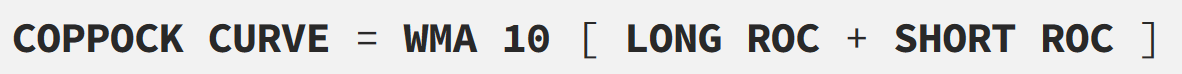
Where:
*   WMA 10  = 10-period weighted moving average
*   LONG ROC = 14-period rate of change
*   SHORT ROC = 11-period rate of change





## **Calculate the WMA**
It is a moving average calculated by assigning more weight to the most recent price data.

In [198]:
# Make a function to generate the wma which takes two arguments as input -
# one dataframe containing the data and the lookback period\

def wma(data, period):

  # Generate the weights using 'arange' function
  weight = np.arange(1, period+1)
  
  # Use the rolling function to generate the rolling data
  rolling_data = data.rolling(period)

  # Use the lambda function to multiply the weight matrix with the prices and then 
  # divide it by the sun of all elements of the weight matric to generate the wma function
  wma = rolling_data.apply(lambda prices: np.dot(prices, weight) / weight.sum(), raw = True)
  return wma

## **Calculate the ROC**
It it the percentage change in price between the current price and the price a certain number of periods ago.

In [ ]:
# Make a function to generate the roc which also takes the same two arguments 
# same as the above function
def roc(close, period):

  # Take the difference of today's price and the previous price
  difference = close.diff(period)

  prev_price = close.shift(period)

  # Divide the differnce from the previous price to get the rate of change
  roc = (difference / prev_price) * 100
  return roc 

## **Calculate the Coppock Curve using the WMA and ROC calculated**

In [199]:
# Make a function to calculate the coppock curve which takes four arguments - 
# the closing prices, two period for two roc and one period for wma

def coppock_curve(close, period1, period2, wma_period):

  # Pass the two periods to the 'roc' function to get the longer and shorter roc
  roc_14 = roc(close, period1)
  roc_11 = roc(close, period2)

  # Take the sum of two roc calculated 
  Roc = roc_14 + roc_11

  # Calculate the coppock curve by passing the sum of the two roc to the 'wma' function
  cc = wma(Roc, wma_period)

  # Return the calculated coppock curve
  return cc

## **Plot the curve**

In [200]:
# Make a function to plot the calculated data of coppock curve which takes 
# two arguments- one dataframe containing the closing prices and index name

def plot_cc(df1, idx_name):

    # Make two subplots - one for closing prices and one for coppock curve
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")

    # Plot the closing prices 
    axs[0].plot(df1['Close'],label='Close') 
    axs[0].legend(loc='upper left')
    axs[0].grid()

    # Plot the coppock curve with black color
    axs[1].plot(coppock_curve(df1['Close'], 14, 11, 10), label='Coppock Curve', color = 'black')

    axs[1].legend(loc='upper left')
    axs[1].grid()

## **Call the functions to complete the task**

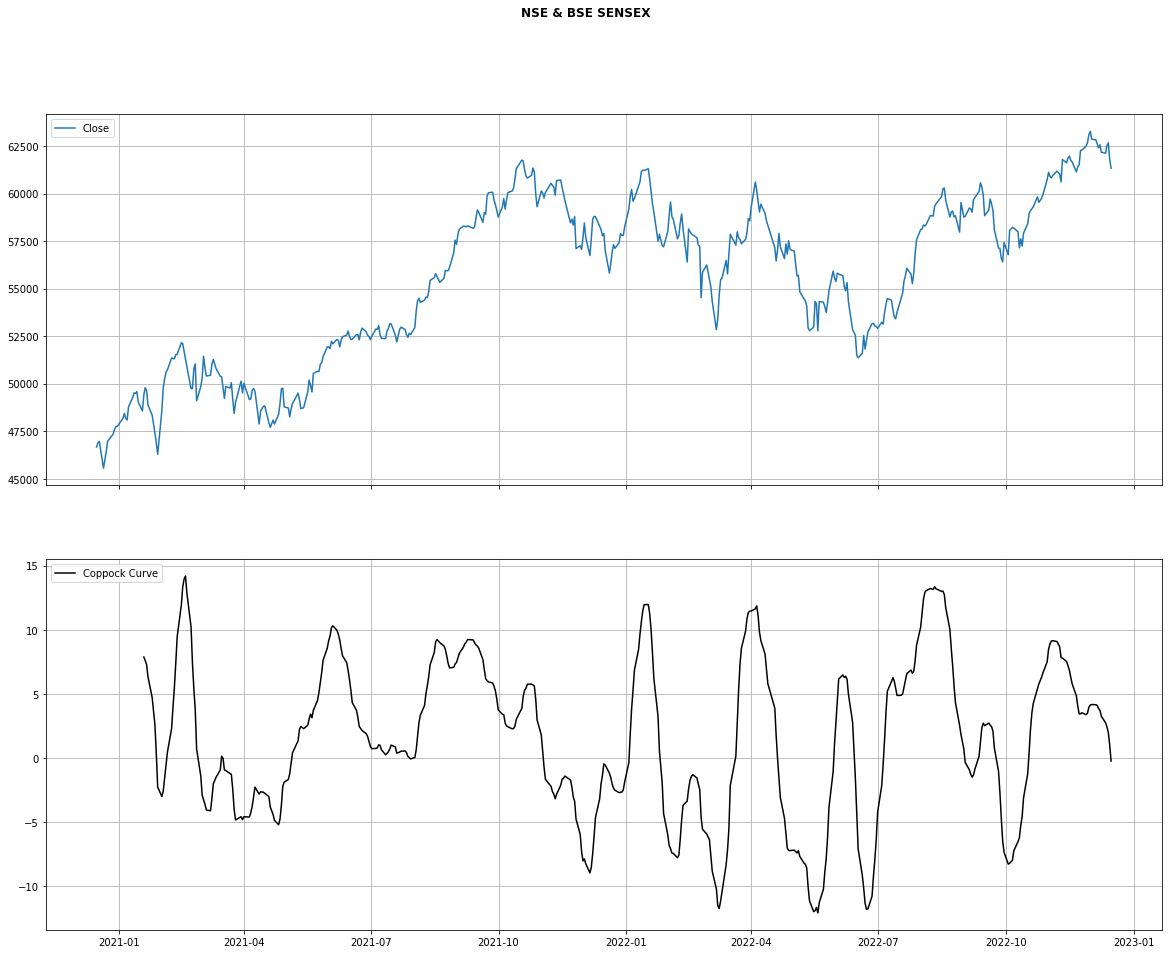

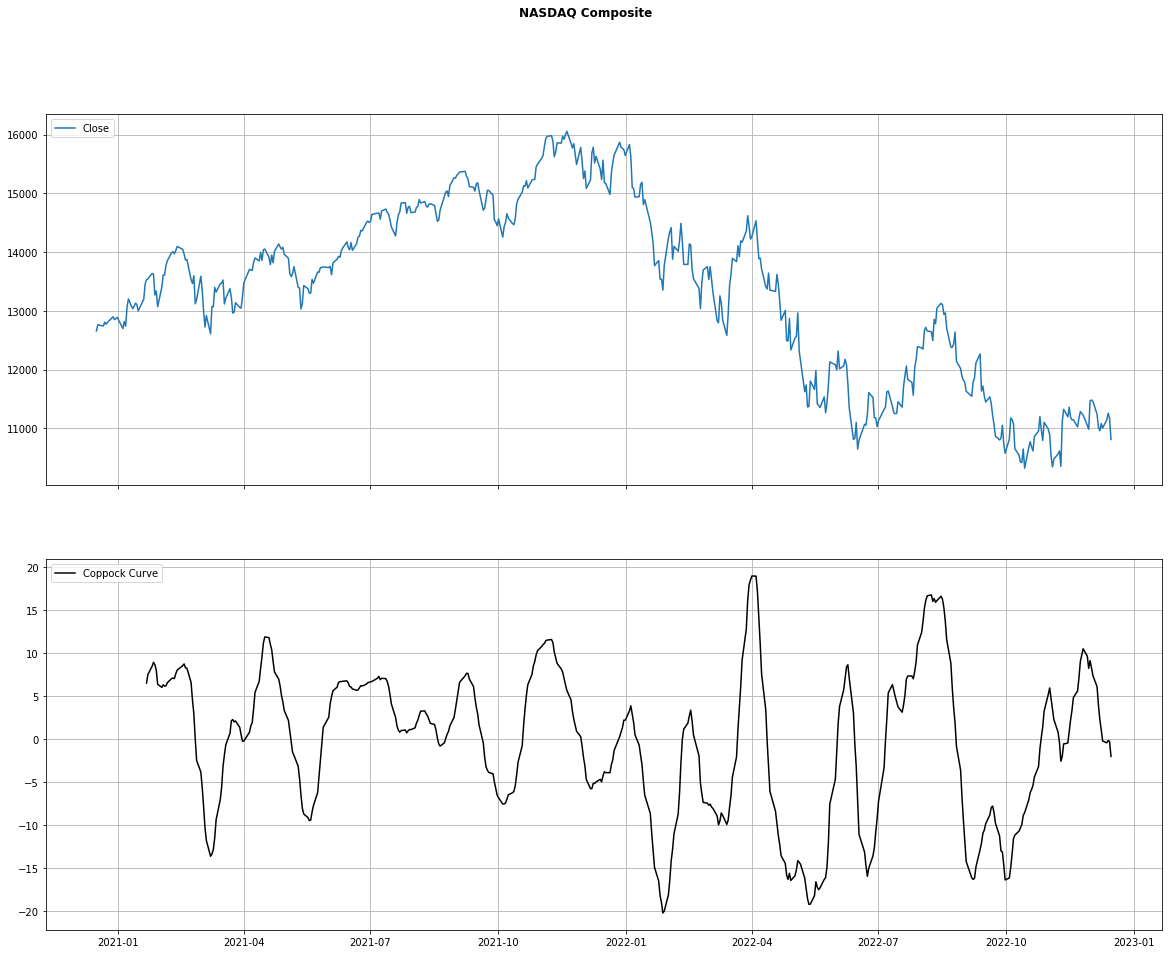

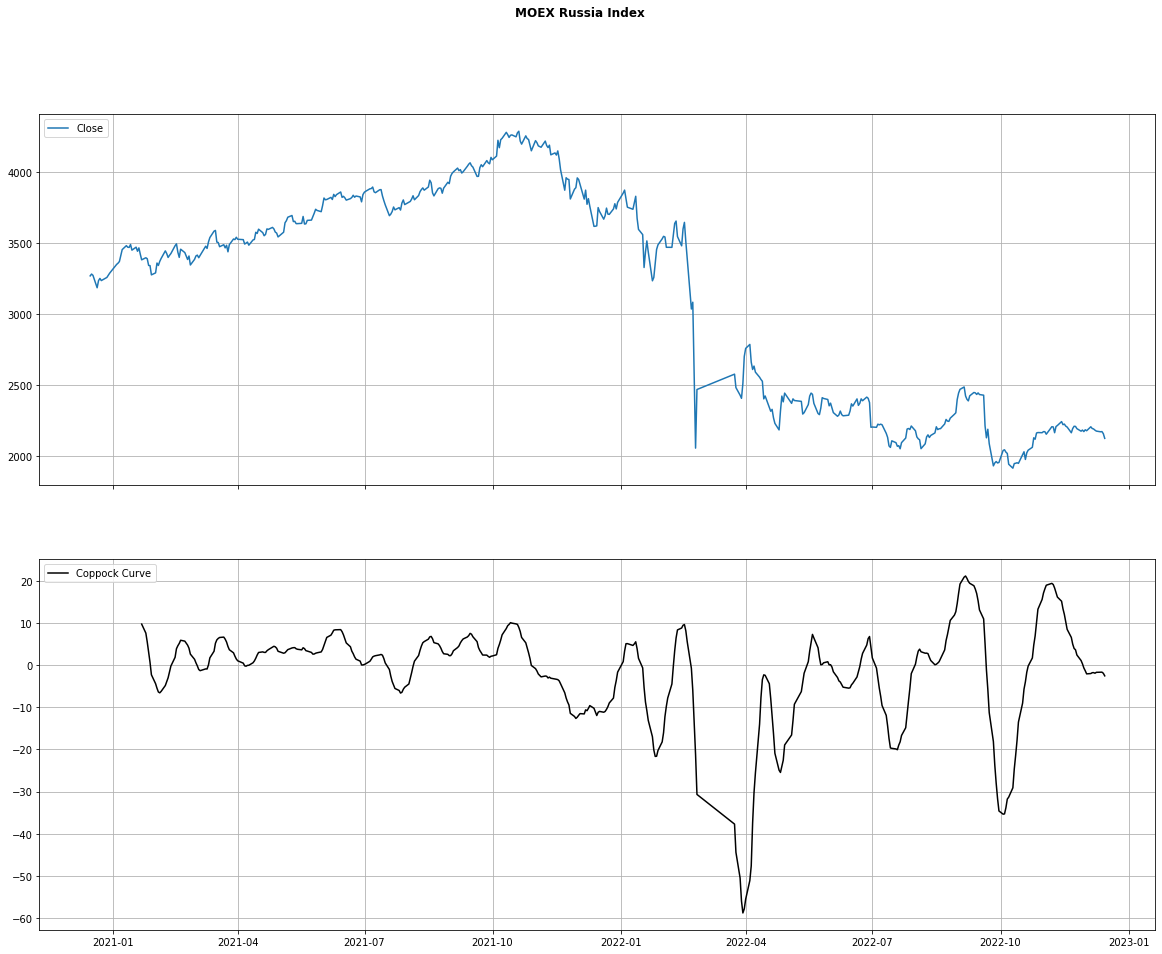

In [201]:
# Make a counter variable and initialize it to zero
i = 0

# Make a loop to download the data for all the indices in the 'indices' list 
# and call the 'plot_cc' function to plot the curve
for i in range(len(indices)):

  # Download the data 
  data =  download_data(indices[i])

  # Plot the curve
  plot_cc(data, INDEX[i])

  # Increment the variable to run the loop for the next index
  i = i+1


## **Overall Analysis**
Like any other oscillator, the Coppock Curve indicator can be used to find divergences – discrepancies in price and indicator readings. If the price reaches a new peak or trough, but the indicator does not reach the corresponding extremes, it diverges. Such a signal means that the current trend may be slowing, andwe could wait for either a trend change, or a deep correction, or a price transition to the side. Even though the Coppock Curve indicator is not widely used among traders, it can be a useful trading tool for detecting price fluctuations. The indicator does not redraw its values, which is a good advantage. Due to its settings, the indicator can be used both in the trending market and during consolidation periods.